# Importing the Necessary Libraries

In [1]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

import contractions
#import inflect

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Reading the File

In [2]:
df=  pd.read_csv('Womens Clothing E-Commerce Reviews.csv', na_values='NaN')

In [3]:
pd.set_option('max_columns',20)

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Dropping the Unnamed Column

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace  = True)

## Basic Information of the Data Set 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


**The data set has 10 columns and 23486 data points. There are some null values under Title, Review Text, Division Name, Department Name and Class Name columns.**|

## Basic Statistics of the Data Set

In [7]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


**The youngest customer is 18 years old and the oldest one is 99. Average age is around 43 and rating varies between 1 to 5 and average rating is around 4.2.**

## Missing value Heatmap of the Data Set

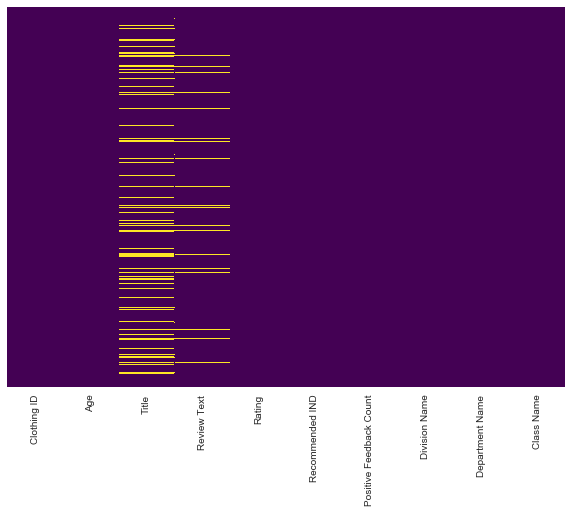

In [8]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

** As seen, mostly the missing values are cumulated under Title and Review Text  columns. Since we will need both columns for our model, we will concataneta the non-null values of either columns.**

## Renaming Columns Based on _ and Lowercase Rules 

In [9]:
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

In [10]:
cleanup_column_names(df)

## Concatenating the Title and Review Text Columns (Based on Either Non-Null Values)

In [11]:
df2 = df[df.title.notnull() | df.review_text.notnull()]
df2.review_text.astype(str)
df2.title.astype(str)
df2['new_text'] = df2[['title', 'review_text']].apply(lambda x: ' '.join(str(y) for y in x if str(y) !='nan'), axis=1)
df2.drop('title', axis = 1, inplace = True)
df2.head()

,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


** We have a new column named as new_text which consists of Review Text and Title either non-null values. Then we dropped the Title column.**

## Cleaning the Text Which We will Use in Our Model

In [12]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
                                              
def normalize_corpus(text, lowercase=True, remove_stop_words=True, remove_url=True):
    
    """[1] Lowercase the text 
       [2] Keep only words 
       [3] Find URLs 
       [4] Remove links from posts 
       [5] Expending contractions 
       [6] Removing whitespace 
       [7] Remove apostrophe sign  
       [8] Remove stopwords and Stemming"""
    
    # Creating stopwordlist and editing 
    stopword_list= stopwords.words('english')
    
    # "no" and "not" may give us information so those are removed from stop lists
    stopword_list.remove('no') 
    stopword_list.remove('not')
    
    ##[1] Lowercase the text
    if (lowercase==True):
        text = str(text).lower()
    
    ##[2] Keeping only words
    text = re.sub(r'[^a-zA-Z]',r' ', text)
    
    ##[3] Find URLs
    global URLs
    URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+', text)
    #URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    
    ##[4] Removing Links 
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'', text)
    
    ##[5] Expending contractions such as I'm, you're into I am, you are
    text = contractions.fix(text)
     
    ##[6] Removing whitespace
    text = re.sub(r'nbsp', r'', text)
        
    ##[7] Removing ' (apostrophe) sign
    text = re.sub(r"'", r'', text)
      
    ##[8] Removing stopwords and Lemmatization
    if (remove_stop_words==True):
        
        text = " ".join([lemmatizer.lemmatize(w) for w in text.split(' ') if w not in stopword_list])
        
    else:
        
        text = " ".join([lemmatizer.lemmatize(w) for w in text.split(' ')])
        
    return text


In [13]:
#nltk.download("wordnet", "C:\Users\Mike/nltk_data/")
df2['clean_text'] = df2['new_text'].map(lambda text: normalize_corpus(text))

** After applying the function, we have a new column named as clean_text**

## The Length of the Clean_Text

In [14]:
df2['review_length'] = df2['clean_text'].map(len)

In [15]:
df2.head(1)

,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text,clean_text,review_length
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,45


** We have a new column named as review_length which shows the length of the reviews by counting the letters**

## Classifying the Ratings as Good, Neutral and Bad

In [16]:
bad_rat = len(df2[df2.rating <3])
neut_rat = len(df2[df2.rating ==3])
good_rat = len(df2[df2.rating >3])

print ('Bad ratings : {}'.format(bad_rat))
print ('Neutral ratings : {}'.format(neut_rat))
print ('Good ratings : {}'.format(good_rat))

Bad ratings : 2370
Neutral ratings : 2823
Good ratings : 17449


** We classified the ratings as Good which is bigger than 3, Neutral which equals 3 and Bad which is less than 3.** 

## Applying the New Classification to the Ratings Column

In [17]:
df2['rating_class'] = df2['rating'].apply(lambda x: 'bad' if x < 3 else('good' if x > 3 else 'neutral'))

** After applying the new classification we have a new column named as rating_class consists of three classes, 'Good, Neutral and Bad'**

## Applying Tokenizer to Create Tokens for the Review Text

In [18]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df2["tokens"] = df2["clean_text"].apply(tokenizer.tokenize)
df2.head()

,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text,clean_text,review_length,rating_class,tokens
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,45,good,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store...,195,good,"[love, dress, sooo, pretty, happened, find, st..."
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,major design flaw high hope dress really wante...,338,neutral,"[major, design, flaw, high, hope, dress, reall..."
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun ...,110,good,"[favorite, buy, love, love, love, jumpsuit, fu..."
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...,132,good,"[flattering, shirt, shirt, flattering, due, ad..."


** We applied tokenizer to create a new column named tokens which consists of the list of the reviews.** 

In [19]:
all_words = [word for tokens in df2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df2["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max review length is (word based) %s" % max(sentence_lengths))

697899 words total, with a vocabulary size of 12615
Max review length is (word based) 64


## Dropping the Other Null Values and Saving the Cleaned_Data

In [20]:
df2.dropna(axis = 0, inplace =True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 14 columns):
clothing_id                22628 non-null int64
age                        22628 non-null int64
review_text                22628 non-null object
rating                     22628 non-null int64
recommended_ind            22628 non-null int64
positive_feedback_count    22628 non-null int64
division_name              22628 non-null object
department_name            22628 non-null object
class_name                 22628 non-null object
new_text                   22628 non-null object
clean_text                 22628 non-null object
review_length              22628 non-null int64
rating_class               22628 non-null object
tokens                     22628 non-null object
dtypes: int64(6), object(8)
memory usage: 2.6+ MB


In [21]:
df2.to_csv('Cleaned_Women_ECommerce.csv', encoding='utf-8')